In [1]:
import os
import requests
from dotenv import load_dotenv
from langsmith import traceable
from langchain_nvidia_ai_endpoints import ChatNVIDIA
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser





In [2]:
### Getting Path of current file
import os
import sys
from pathlib import Path

path = Path(os.path.dirname(os.getcwd()))
path = str(path)
print(path)
sys.path.insert(1, path)

/Users/saideepbunny/Projects/Email-Assistant-using-Generative-AI


In [3]:
load_dotenv(dotenv_path=f"{path}/config/ls_config.env")


os.environ["LANGSMITH_API_KEY"] = os.getenv("LANGSMITH_API_KEY")
os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_PROJECT"] = os.getenv("LANGSMITH_PROJECT")
os.environ["LANGSMITH_ENDPOINT"] = os.getenv("LANGSMITH_ENDPOINT")
nvidia_token = os.getenv("NVIDIA_NIM_GEMMA_API_KEY")

In [4]:

@traceable(name="Classify mails")
def classify_mails(email_content: str):
    prompt = ChatPromptTemplate.from_messages([
        ("user", """Dear Saideep,
        
We have received your job application for Data Science Intern - Generative AI (Remote) and are delighted that you are ready to build a career you're proud of.
What happens next? We'll review your job application and contact you if there is a good match.If you are not offered an opportunity at this time, we may keep your information on file to evaluate you for other positions. To learn about our data use practices or how to contact us, visit our privacy statement: https://www.crowdstrike.com/privacy-notice/
Thanks again for your interest in CrowdStrike, and we wish you success in your job search!

Sincerely,
The CrowdStrike Talent Acquisition Team

Identify whether the above email is related to job application or not. The meaning of job application in this context is whether the email indicates that the candidate has already applied to a job and the email is written to inform about the status of the job.
Answer in one word, YES is the email is related to job application and NO otherwise"""),
        
        ("assistant", """YES"""),
        
        ("user", """Dear Saideep,
        
        Be quick to apply for jobs, Below are some of the jobs you might be interested in.
        
        Data Engineer
        Data Scientist
        ML Engineer
        AI Engineer
        
        Sincerely,
        The Jobright.AI Team
        
        Identify whether the above email is related to job application or not. The meaning of job application in this context is whether the email indicates that the candidate has already applied to a job and the email is written to inform about the status of the job.
        Answer in one word, YES is the email is related to job application and NO otherwise"""),
                
        ("assistant", """NO"""),   

        ("user", """Dear Saideep,
        
        Will yoy be available to meet on saturday at 3pm for 10 mins? Please do let me know.

        Regards,
        John Doe
        
        Identify whether the above email is related to job application or not. The meaning of job application in this context is whether the email indicates that the candidate has already applied to a job and the email is written to inform about the status of the job.
        Answer in one word, YES is the email is related to job application and NO otherwise"""),
                
        ("assistant", """NO"""),   
        
        ("user", """
        {email_content}
        
        Identify whether the above email is related to job application or not. The meaning of job application in this context is whether the email indicates that the candidate has already applied to a job and the email is written to inform about the status of the job.
Answer in one word, YES is the email is related to job application and NO otherwise""")
    ])

    # Use the NVIDIA LLM via LangChain
    llm = ChatNVIDIA(
        model="google/gemma-3n-e2b-it",
        api_key=nvidia_token, 
        temperature=0.2,
        max_tokens=1024,
        streaming=False
    )

    # Define chain
    chain = prompt | llm | StrOutputParser()

    # Run it
    return chain.invoke({"email_content": email_content})


In [5]:
mail = """Saideep,

We’re glad that you’re interested in a career at JPMorganChase!

Your application for the position listed below was successfully submitted and we appreciate your patience as we review all applications for this job opportunity. Please check your email for updates and feel free to log into your candidate profile on our job search site at any time to view your application status.  

Data Scientist - Process Intelligence 210639777

Thanks for taking the time to apply and good luck!

Sincerely, 
JPMorganChase Talent Team

"""

output = classify_mails(mail)
print(output)

/Users/saideepbunny/anaconda3/envs/mail_asst/lib/python3.10/site-packages/langchain_nvidia_ai_endpoints/_common.py:217: UserWarning: Found google/gemma-3n-e2b-it in available_models, but type is unknown and inference may fail.
  warnings.warn(


YES


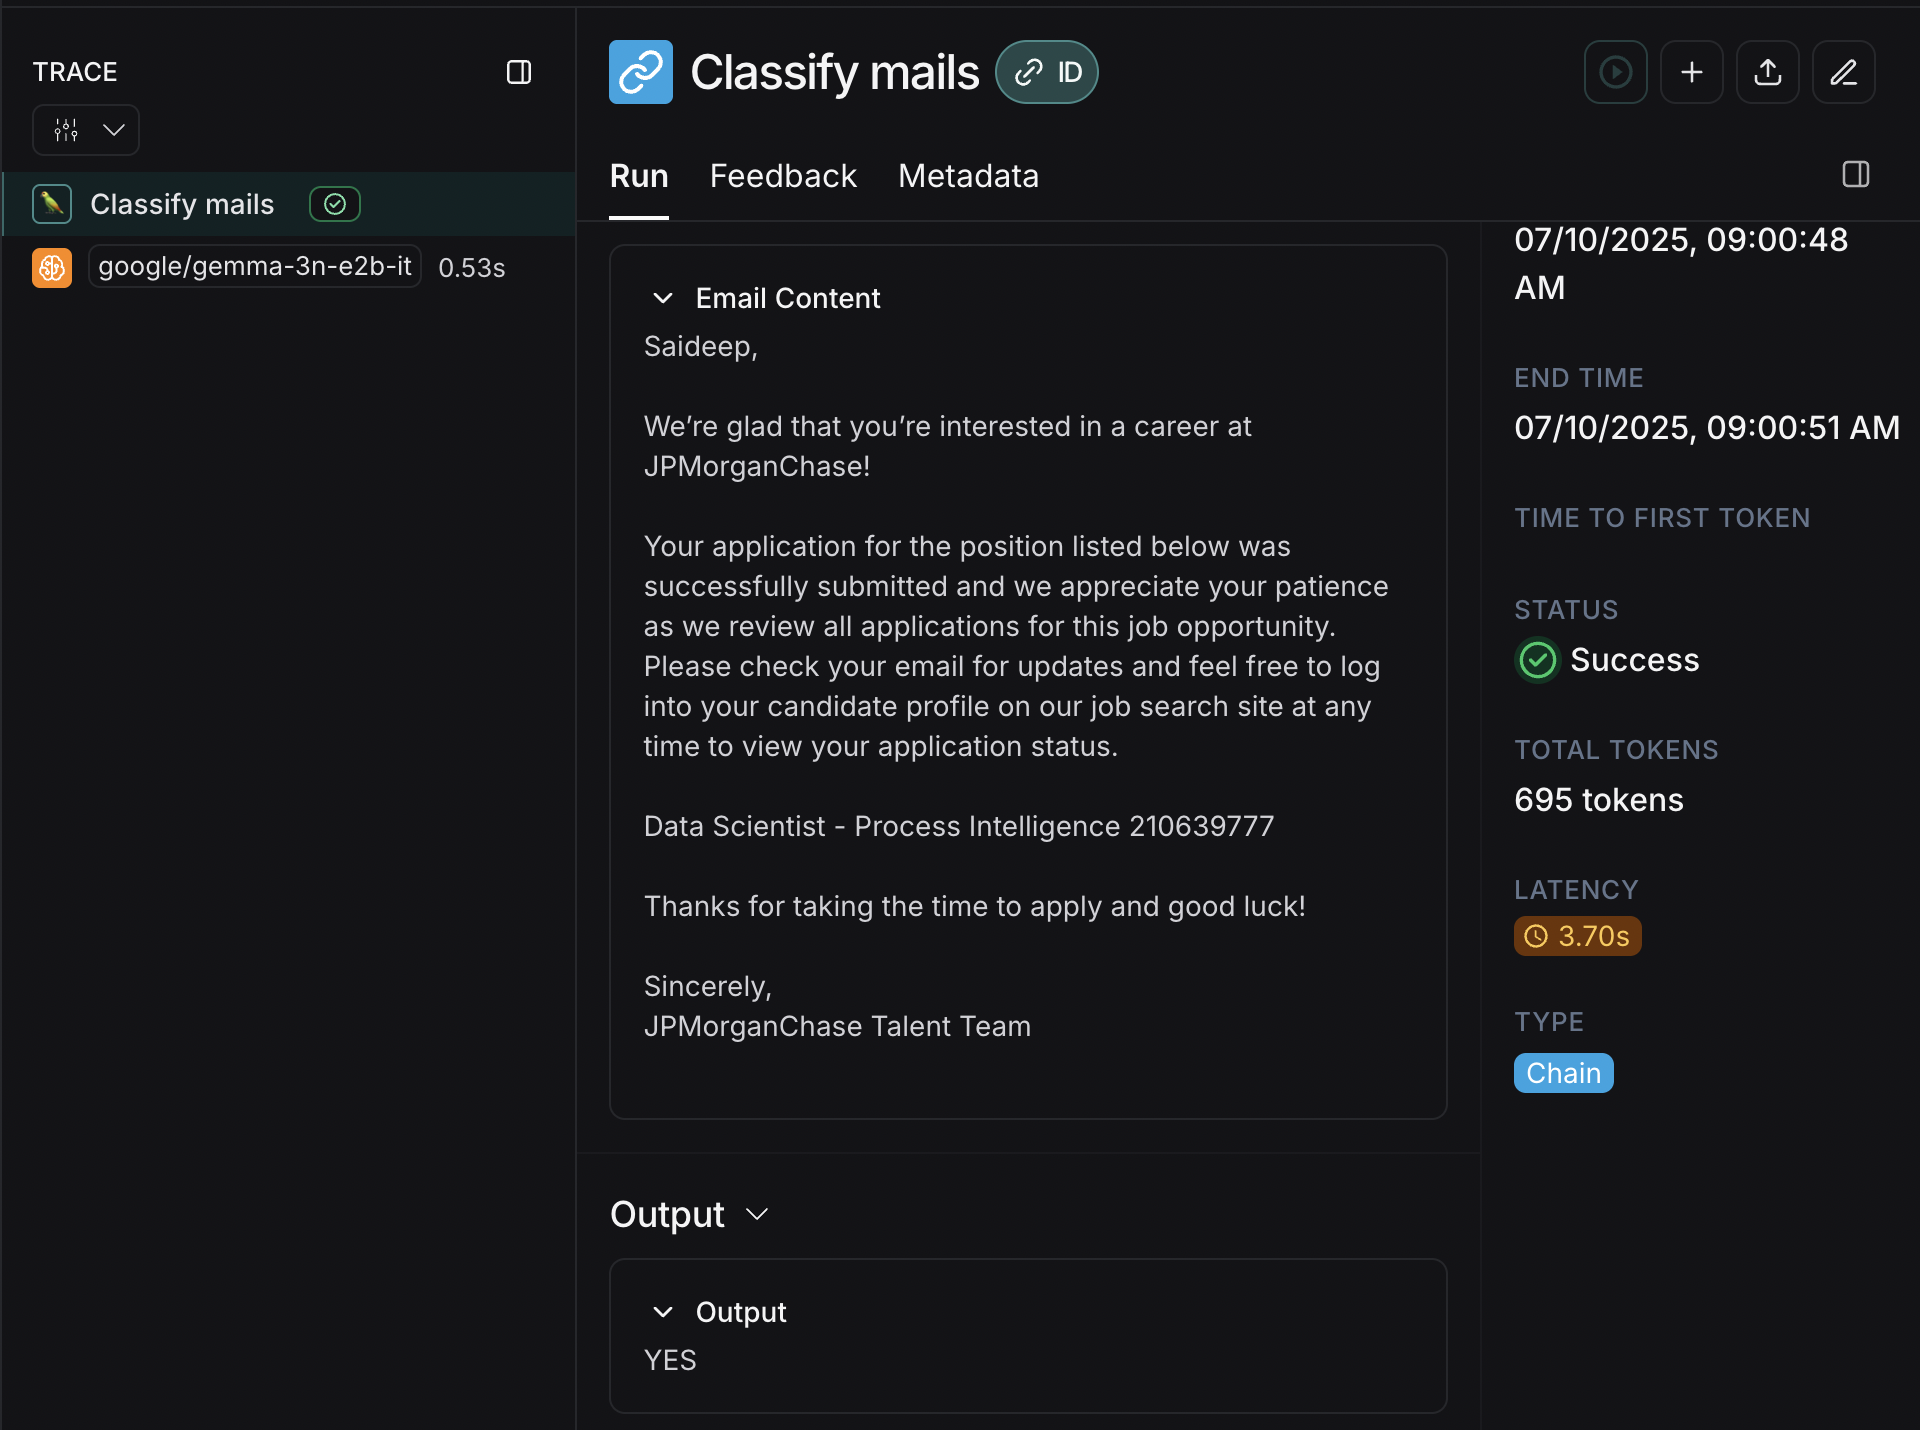